In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

In [4]:
import os
import pandas as pd

# 입력한 경로
directory_path = "result"

# 해당 경로의 모든 파일 목록 얻기
file_list = os.listdir(directory_path)

# CSV 파일만 선택하기
csv_files = [file for file in file_list if file.endswith('.csv')]

# 읽어온 데이터를 저장할 딕셔너리
data_frames_dict = {}

# 각 CSV 파일을 읽어와서 딕셔너리에 추가
for csv_file in csv_files:
    file_path = os.path.join(directory_path, csv_file)
    df = pd.read_csv(file_path)
    data_frames_dict[csv_file] = df

In [38]:
train_mul_linear = data_frames_dict['ml.csv'][['Step', 'Value']].rename(columns={'Value':'train_ml'})
train_mul_parameter = data_frames_dict['mp.csv'][['Step', 'Value']].rename(columns={'Value':'train_mp'})
train_plus_linear = data_frames_dict['pl.csv'][['Step', 'Value']].rename(columns={'Value':'train_pl'})
train_plus_parameter = data_frames_dict['pp.csv'][['Step', 'Value']].rename(columns={'Value':'train_pp'})
train_pretrained = data_frames_dict['pre.csv'][['Step', 'Value']].rename(columns={'Value':'pretrained'})

valid_mul_linear = data_frames_dict['ml(1).csv'][['Step', 'Value']].rename(columns={'Value':'valid_ml'})
valid_mul_parameter = data_frames_dict['mp(1).csv'][['Step', 'Value']].rename(columns={'Value':'valid_mp'})
valid_plus_linear = data_frames_dict['pl(1).csv'][['Step', 'Value']].rename(columns={'Value':'valid_pl'})
valid_plus_parameter = data_frames_dict['pp(1).csv'][['Step', 'Value']].rename(columns={'Value':'valid_pp'})
valid_pretrained = data_frames_dict['pre(1).csv'][['Step', 'Value']].rename(columns={'Value':'pretrained'})

score_mul_linear = data_frames_dict['ml(2).csv'][['Step', 'Value']].rename(columns={'Value':'score_ml'})
score_mul_parameter = data_frames_dict['mp(2).csv'][['Step', 'Value']].rename(columns={'Value':'score_mp'})
score_plus_linear = data_frames_dict['pl(2).csv'][['Step', 'Value']].rename(columns={'Value':'score_pl'})
score_plus_parameter = data_frames_dict['pp(2).csv'][['Step', 'Value']].rename(columns={'Value':'score_pp'})
score_pretrained = data_frames_dict['pre(2).csv'][['Step', 'Value']].rename(columns={'Value':'pretrained'})

In [39]:
train = pd.merge(pd.merge(pd.merge(pd.merge(train_mul_linear, train_mul_parameter, on = ['Step'], how = 'left'), train_plus_linear, on = ['Step'], how = 'left'), train_plus_parameter, on = ['Step'], how = 'left'), train_pretrained, on = ['Step'], how = 'left')
valid = pd.merge(pd.merge(pd.merge(pd.merge(valid_mul_linear, valid_mul_parameter, on = ['Step'], how = 'left'), valid_plus_linear, on = ['Step'], how = 'left'), valid_plus_parameter, on = ['Step'], how = 'left'), valid_pretrained, on = ['Step'], how = 'left')
score = pd.merge(pd.merge(pd.merge(pd.merge(score_mul_linear, score_mul_parameter, on = ['Step'], how = 'left'), score_plus_linear, on = ['Step'], how = 'left'), score_plus_parameter, on = ['Step'], how = 'left'), score_pretrained, on = ['Step'], how = 'left')

In [62]:
style.use('seaborn-ticks')
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

# Figure 2-a
- pretrained Resnet-18 plotting

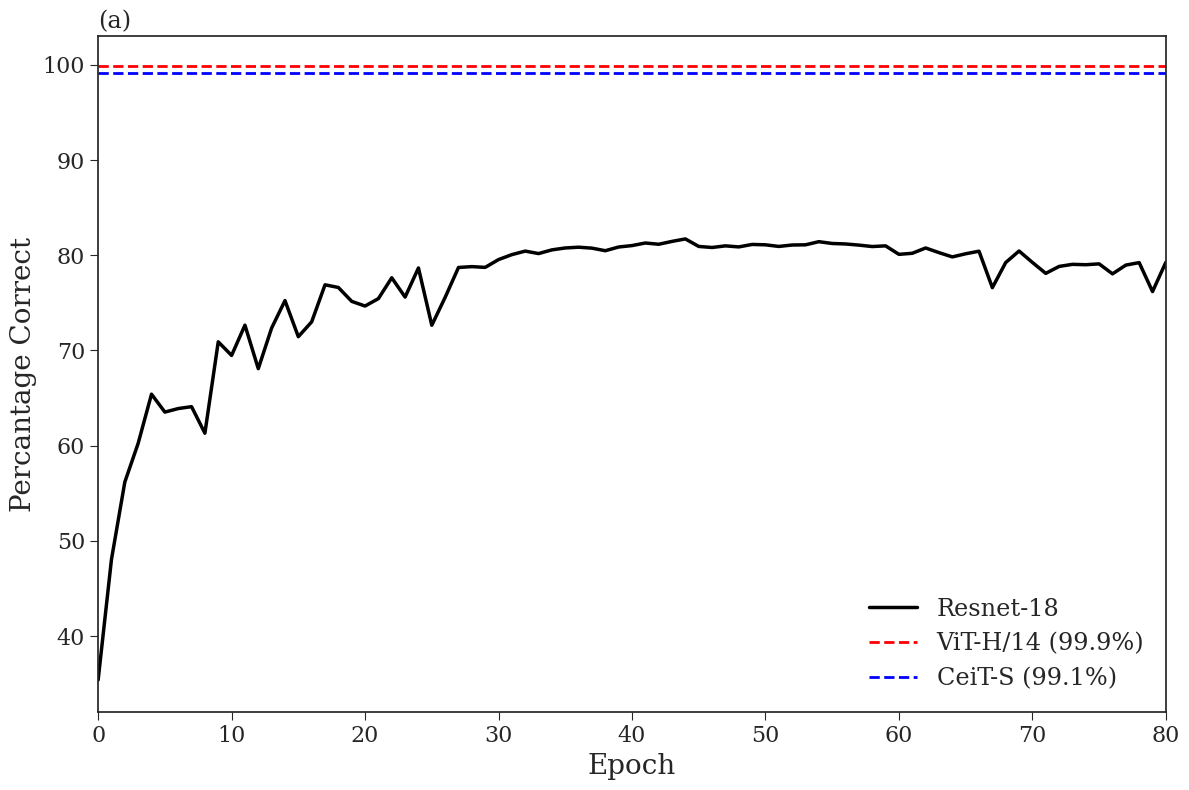

In [111]:
data = score
data_name = 'score'

plt.figure(figsize=(12, 8))
plt.plot(data['Step'], data[f'{data_name}_ml'], label=f'Resnet-18', color='black', linewidth=2.5)

# 빨간 점선 그리기
plt.axhline(y=99.9, color='red', linestyle='--', label='ViT-H/14 (99.9%)', linewidth=2)
plt.axhline(y=99.1, color='blue', linestyle='--', label='CeiT-S (99.1%)', linewidth=2)

# 그래프 스타일 설정
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Percantage Correct', fontsize=20)
plt.legend(loc='lower right', fontsize='xx-large')

# x축, y축 눈금 크기 설정
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# x축 범위 설정
plt.xlim(0, 80)
plt.ylim(32, 103)

# 타이틀에 (a) 추가 및 위치 조절
plt.title('(a)', loc='left', fontsize='xx-large')

plt.tight_layout()

# 그래프 표시
plt.show()

# Figure 2-(b)
- resnet-18 best score(black dotted), 4 methods valid score

In [114]:
score[:].max()

Step          99.000000
score_ml      81.720001
score_mp      82.540001
score_pl      84.470001
score_pp      83.980003
pretrained    83.739998
dtype: float64

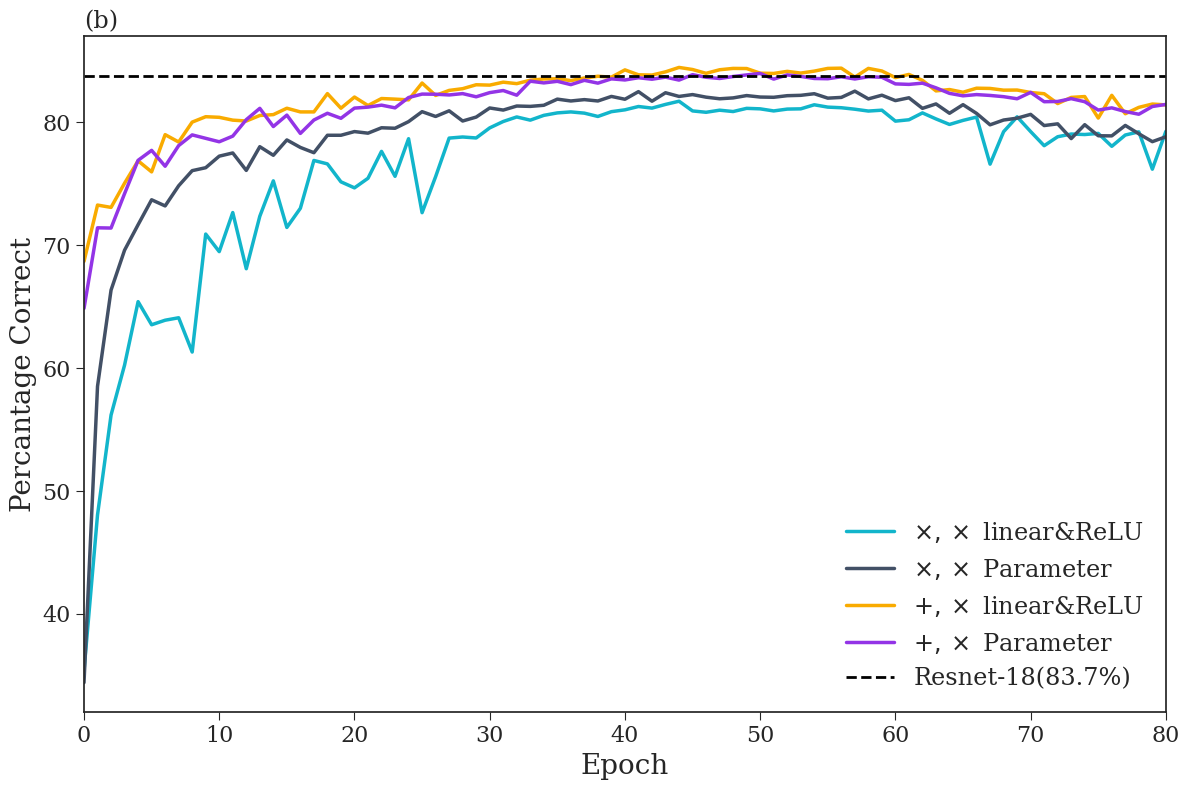

In [113]:
data = score
data_name = 'score'

plt.figure(figsize=(12, 8))
plt.plot(data['Step'], data[f'{data_name}_ml'], label=f'$\\times, \\times$ linear&ReLU', color='#12b5cb', linewidth=2.5)
plt.plot(data['Step'], data[f'{data_name}_mp'], label=f'$\\times, \\times$ Parameter', color='#425066', linewidth=2.5)
plt.plot(data['Step'], data[f'{data_name}_pl'], label=f'$+, \\times$ linear&ReLU', color='#f9ab00', linewidth=2.5)
plt.plot(data['Step'], data[f'{data_name}_pp'], label=f'$+, \\times$ Parameter', color='#9334e6', linewidth=2.5)

# 점선 그리기
plt.axhline(y=score['pretrained'].max(), color='black', linestyle='--', label='Resnet-18(83.7%)', linewidth=2)

# 그래프 스타일 설정
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Percantage Correct', fontsize=20)
plt.legend(loc='lower right', fontsize='xx-large')

# x축, y축 눈금 크기 설정
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# x축 범위 설정
plt.xlim(0, 80)
plt.ylim(32, 87)

# 타이틀에 (a) 추가 및 위치 조절
plt.title('(b)', loc='left', fontsize='xx-large')

plt.tight_layout()

# 그래프 표시
plt.show()